<a href="https://colab.research.google.com/github/PhucNguyenZed/AnalystDeepLearning/blob/main/Lab02Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
def load_data(filename):
  return pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/covid19/'+filename)#đọc file trên github
dfcovid19 = load_data('countriessample.csv')#load file
dfcovid19.head()

,Date,CountryRegion,Confirmed,Recovered,Deaths
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0
1,1/22/2020,Greece;Europe,NaN,NaN,0.0
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0
3,1/22/2020,India;Asia,0.0,NaN,0.0
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0


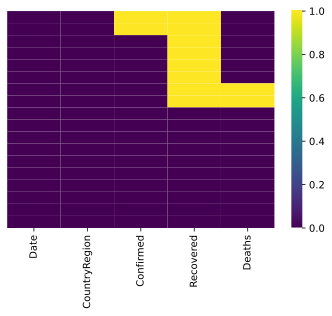

In [10]:

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(dfcovid19.isna(), 
            yticklabels=False, #trục Y
            cbar=True, #đơn vị
            cmap='viridis')

In [11]:
import pandas as pd
#tạo dataframe
df = pd.DataFrame({
    'History': [76, 84, 68, 94],
    'Math': [81, 67, 91, 86],
    'English': [72, 93, 84, 76]
})
#in ra dataframe
print('The orginal dataframe:\n')
print(df)
#áp dụng hàm
def get_mean(scores):
  return sum(scores)/len(scores)
# điểm trung bình
result = df.apply(get_mean)
print("\nThe result of applying the function on the dataframe:\n")
print(result)

The orginal dataframe:

   History  Math  English
0       76    81       72
1       84    67       93
2       68    91       84
3       94    86       76

The result of applying the function on the dataframe:

History    80.50
Math       81.25
English    81.25
dtype: float64


**Example 3: Apply a function to each row (axis = 1) of the dataframe**

In [12]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({
    'History': [76, 84, 68, 94],
    'Math': [81, 67, 91, 86],
    'English': [72, 93, 84, 76]
}, index=['Sam', 'Greta', 'Mike', 'Emma'])
print("The original dataframe:\n")
print(df)

def get_mean(scores):
    return sum(scores)/len(scores)

result=df.apply(get_mean,axis=1)#axis=1
print("\nThe result of applying the function on the dataframe:\n")
print(result)

The original dataframe:

       History  Math  English
Sam         76    81       72
Greta       84    67       93
Mike        68    91       84
Emma        94    86       76

The result of applying the function on the dataframe:

Sam      76.333333
Greta    81.333333
Mike     81.000000
Emma     85.333333
dtype: float64


In [13]:
def split_name_series(string):
  country, region=string.split(';')
  return pd.Series(
      (country, region),
      index='country, region'.split()
  )

In [14]:
def split_name(x_df):
    res=x_df['CountryRegion'].apply(split_name_series)
    x_df[res.columns]=res
    return x_df

In [15]:
res=load_data('countriessample.csv').pipe(split_name)
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,Africa
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,Europe
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,Europe
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,Asia
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,Asia
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,Asia
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,Asia
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,Europe
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,Africa
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,South America


**Example 6:**

In [16]:
def substitute_region(x_df):
    mapping={'Africa':'AF', 'Asia':'AS','Europe':'EU','South America':'SA','North America':'NA'}
    x_df['region']=x_df['region'].map(mapping)
    return x_df

In [17]:
res=(res.pipe(substitute_region))
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,AF
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,EU
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,EU
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,AS
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,AS
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,AS
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,AS
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,EU
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,AF
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,SA


**pandas.cut**

**Example 7: **

In [18]:
import pandas as pd
import numpy as np
a = pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)

In [19]:
a

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]


**Example 8:**

In [20]:
import pandas as pd
import numpy as np
pd.cut(np.array([1, 7, 5, 4, 6, 3]),bins = 3, labels=["bad", "medium", "good"])

['bad', 'good', 'medium', 'medium', 'good', 'bad']
Categories (3, object): ['bad' < 'medium' < 'good']

**Example 9**

In [21]:
import pandas as pd
import numpy as np
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3,labels=["B", "A", "B"], ordered=False)

['B', 'B', 'A', 'A', 'B', 'B']
Categories (2, object): ['A', 'B']

**Example 10:**

In [22]:
def create_evaluation_group(x_df):
    bins=[0.0, 3000, 5000, sys.maxsize]
    labels=['normal', 'medium', 'worst']
    evaluationGroup=pd.cut(x_df['Confirmed'], bins=bins, labels=labels,include_lowest=True)
    x_df['Evaluation']=evaluationGroup
    return x_df

In [23]:
res=(res.pipe(create_evaluation_group))
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region,Evaluation
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,AF,NaN
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,EU,NaN
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,EU,normal
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,AS,normal
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,AS,normal
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,AS,normal
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,AS,normal
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,EU,normal
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,AF,medium
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,SA,normal



**BÀI THỰC HÀNH TRÌNH BÀY DỮ LIỆU**

In [24]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
from google.colab import drive
drive.mount('/drive',force_remount=True)

Mounted at /drive


In [26]:
df = pd.read_csv("/drive/My Drive/DataAnalyst/DataAnalystDeepLearning-main/Data/dulieuxettuyendaihoc.csv", index_col = "STT")

In [27]:
df


,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,H2,S2,V2,X2,D2,N2,T3,L3,H3,S3,V3,X3,D3,N3,T4,L4,H4,S4,V4,X4,D4,N4,T5,L5,H5,S5,V5,X5,D5,N5,T6,L6,H6,S6,V6,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT
STT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,7.2,7.3,6.3,7.3,7.0,7.9,7.3,5.5,8.4,8.9,5.8,9.0,6.6,8.7,7.2,5.8,7.4,7.4,5.2,6.6,6.9,8.9,8.1,5.8,7.2,7.1,5.9,7.2,6.6,5.8,8.1,5.9,7.4,5.6,6.1,5.7,7.9,5.0,7.4,5.0,6.9,5.7,6.5,7.2,8.4,6.6,7.6,5.9,F,NaN,2NT,3.25,3.25,4.50,A1
2,5.4,3.9,3.9,4.0,5.4,5.4,5.3,2.8,6.3,5.4,3.2,7.2,5.4,6.1,4.7,4.7,4.3,3.8,3.7,3.7,5.2,6.6,5.8,4.4,4.9,2.8,5.1,4.5,5.6,7.0,7.6,4.7,3.0,4.6,4.4,4.9,4.3,6.3,6.7,4.4,4.0,5.4,4.0,5.2,5.5,6.6,6.1,4.4,M,NaN,1,6.00,4.00,3.50,C
3,5.6,6.8,7.2,7.5,4.3,7.4,5.8,3.2,5.0,4.9,6.2,6.1,5.3,7.1,4.0,4.9,2.8,6.3,6.2,5.6,2.5,5.8,5.1,3.7,6.1,6.1,5.8,6.8,4.0,6.4,5.3,4.1,4.8,5.1,6.4,5.1,4.0,6.9,3.9,3.2,5.7,6.6,6.8,6.8,4.1,7.9,8.1,4.6,M,NaN,1,5.00,6.75,4.00,C
4,6.6,6.4,5.3,6.9,5.4,7.3,6.4,5.8,5.1,6.2,5.5,5.5,4.4,6.5,4.9,4.4,5.9,7.3,5.9,4.9,5.7,6.8,6.8,5.4,4.1,4.4,4.1,7.3,5.3,7.1,7.3,5.6,6.1,4.9,5.3,4.0,6.2,5.5,5.9,6.5,7.4,5.6,6.6,6.8,6.6,7.1,7.3,7.4,M,NaN,1,4.25,4.25,5.25,D1
5,6.0,5.0,6.0,7.3,6.5,7.7,7.9,6.1,5.4,5.5,5.9,7.5,6.5,6.9,7.6,6.4,7.6,7.6,6.7,6.6,5.7,7.9,7.4,7.3,4.4,6.5,5.6,8.3,6.2,4.9,8.6,7.7,6.8,5.4,4.7,5.0,5.1,7.0,7.0,6.3,8.0,6.2,6.8,6.9,6.6,6.1,7.5,7.2,M,NaN,2NT,4.25,4.50,5.00,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,8.6,6.9,7.4,8.8,7.6,5.8,7.3,5.7,8.9,6.8,6.5,7.3,7.0,7.3,6.9,7.6,7.7,5.6,5.9,7.7,6.8,8.1,6.6,7.5,6.7,6.8,6.0,8.3,7.5,7.1,6.8,7.8,7.9,6.7,7.2,6.1,7.2,5.3,5.2,5.2,6.6,6.9,7.4,7.0,7.6,6.3,6.1,6.2,F,NaN,1,5.25,1.50,6.25,C
97,3.7,5.4,6.0,5.1,5.5,3.9,6.1,4.4,4.1,4.8,5.1,4.7,5.9,6.9,4.6,5.4,3.1,3.1,5.3,5.8,5.6,5.4,6.6,4.2,3.4,4.9,5.9,6.9,5.6,6.4,5.7,4.3,5.5,4.7,4.6,3.4,6.9,7.6,7.4,4.9,5.7,7.7,5.0,7.0,6.5,7.9,7.5,4.4,F,NaN,1,5.25,3.75,4.75,C
98,8.8,5.5,7.4,7.7,6.2,7.3,8.1,4.5,9.5,7.3,6.0,8.4,7.0,8.4,8.8,6.5,9.5,6.6,6.4,7.6,7.0,9.6,9.3,6.7,8.5,6.9,5.8,8.4,8.0,8.9,9.6,7.1,9.0,7.1,6.7,5.7,6.9,8.6,8.6,5.9,8.5,7.1,6.2,8.6,7.0,9.6,8.4,5.8,M,NaN,2NT,7.00,8.00,4.00,C


**Phần 1.**

Hãy sắp xếp dữ liệu điểm DH1 theo thứ tự tăng dần

In [28]:
df.sort_values('DH1',ascending=True)

,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,H2,S2,V2,X2,D2,N2,T3,L3,H3,S3,V3,X3,D3,N3,T4,L4,H4,S4,V4,X4,D4,N4,T5,L5,H5,S5,V5,X5,D5,N5,T6,L6,H6,S6,V6,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT
STT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
54,4.9,5.9,6.2,5.6,5.9,5.0,7.0,5.6,6.1,7.1,6.4,6.0,6.3,5.5,6.2,6.6,2.5,4.8,5.0,5.0,4.5,2.4,5.8,3.7,6.2,4.1,4.4,5.2,4.1,6.3,4.9,4.6,4.9,5.2,4.9,5.5,5.5,4.6,5.5,5.4,6.5,7.5,6.1,5.6,5.2,5.7,5.6,6.3,M,NaN,1,1.00,5.50,4.25,A
44,6.6,7.2,5.9,6.9,7.6,8.1,7.3,6.7,6.3,6.9,6.0,6.4,7.0,7.1,6.9,6.2,6.7,7.1,5.4,6.8,6.8,5.9,6.6,6.8,6.0,7.6,6.5,7.6,6.7,7.1,7.9,5.6,5.8,5.9,5.8,4.6,6.6,4.0,6.0,6.2,6.0,7.6,6.5,7.6,6.7,7.1,7.9,5.6,F,1.0,2,1.25,3.50,5.00,D1
73,5.5,6.6,7.2,7.6,5.5,6.7,6.7,5.2,6.0,6.8,6.3,7.2,4.9,4.8,6.6,5.3,4.6,5.5,5.5,7.1,5.2,6.1,7.1,5.4,5.2,4.7,5.8,6.3,5.7,5.6,5.2,5.3,5.2,5.5,6.3,6.6,6.1,6.5,5.3,5.2,6.1,6.2,7.3,7.8,5.5,5.9,6.3,5.5,M,NaN,1,1.50,4.50,5.50,A
6,9.3,7.6,7.9,8.6,7.0,7.3,7.7,7.9,9.6,7.8,8.0,8.7,7.7,8.0,9.2,9.1,7.1,8.5,8.1,8.7,7.2,8.4,7.7,8.2,8.5,8.5,7.7,9.2,8.0,6.6,7.3,8.8,8.5,7.6,8.1,9.0,8.4,6.6,6.6,8.2,7.8,6.4,7.2,7.7,7.7,5.7,8.0,7.8,M,NaN,1,1.50,4.00,6.00,D1
88,7.3,4.3,5.3,5.8,4.9,3.7,5.6,5.3,5.9,6.0,6.3,5.9,5.0,6.6,6.6,4.6,7.1,6.3,7.3,6.7,6.5,5.4,6.7,5.5,7.7,5.4,7.5,7.1,6.8,5.8,6.8,6.5,7.9,5.9,5.9,5.9,5.7,6.1,6.8,6.7,6.6,6.4,6.9,5.7,6.4,6.4,7.2,6.2,M,NaN,1,1.75,4.00,4.50,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,8.4,7.4,6.0,7.8,6.3,7.2,8.5,6.0,9.3,7.0,8.5,8.8,6.9,6.9,7.3,6.8,7.4,7.0,8.0,7.5,7.1,6.7,8.4,5.8,7.7,6.7,8.2,7.5,7.5,6.1,8.1,6.5,8.2,5.9,7.9,8.6,6.1,5.1,7.2,6.1,8.6,7.8,8.9,8.5,6.7,5.5,7.9,6.6,M,NaN,1,6.50,4.50,8.00,A
12,7.9,7.0,9.1,8.6,6.1,7.0,5.6,9.0,8.2,7.1,8.8,7.6,6.9,7.3,7.2,9.0,8.1,8.4,8.5,7.6,5.5,8.0,6.6,8.6,6.9,7.0,8.9,8.6,5.6,5.3,7.1,8.3,8.0,7.8,8.6,7.3,6.2,3.9,5.7,8.6,8.1,7.9,8.3,7.9,6.4,6.4,6.7,8.7,M,NaN,2,6.75,6.50,4.25,D1
24,5.3,6.3,5.7,6.9,5.9,7.5,6.6,5.1,6.4,6.9,4.7,7.4,6.1,8.4,6.4,4.4,6.1,5.8,5.1,7.4,6.7,7.1,6.7,4.3,5.0,3.5,4.5,7.3,6.1,8.8,7.9,3.9,5.3,5.5,6.3,6.7,6.7,7.5,6.7,4.5,6.1,6.8,6.4,6.4,7.6,8.8,6.1,5.2,M,NaN,2NT,6.75,5.25,5.00,C


**Hãy sắp xếp dữ liệu điểm DH2 tăng dần theo nhóm giới tính**


In [29]:
df.sort_values(by=['GT','DH2'])

,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,H2,S2,V2,X2,D2,N2,T3,L3,H3,S3,V3,X3,D3,N3,T4,L4,H4,S4,V4,X4,D4,N4,T5,L5,H5,S5,V5,X5,D5,N5,T6,L6,H6,S6,V6,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT
STT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
96,8.6,6.9,7.4,8.8,7.6,5.8,7.3,5.7,8.9,6.8,6.5,7.3,7.0,7.3,6.9,7.6,7.7,5.6,5.9,7.7,6.8,8.1,6.6,7.5,6.7,6.8,6.0,8.3,7.5,7.1,6.8,7.8,7.9,6.7,7.2,6.1,7.2,5.3,5.2,5.2,6.6,6.9,7.4,7.0,7.6,6.3,6.1,6.2,F,NaN,1,5.25,1.50,6.25,C
26,3.6,5.8,6.9,6.1,5.5,7.2,5.5,4.3,4.2,5.4,6.5,5.5,5.8,5.0,5.3,4.3,4.2,4.5,5.3,5.0,5.6,6.4,5.3,4.1,4.8,4.8,4.7,4.6,5.4,4.1,6.3,5.6,5.8,4.9,4.8,6.3,4.8,2.7,4.4,5.0,3.7,4.5,5.7,5.5,5.6,5.9,6.3,4.4,F,NaN,1,4.75,2.00,5.50,C
25,2.4,4.1,3.6,5.5,5.9,5.6,4.9,4.2,3.3,5.7,4.9,5.3,5.7,4.5,5.6,4.8,3.9,4.6,4.6,6.9,5.7,8.0,5.1,4.7,3.3,5.3,5.6,6.9,7.2,7.3,6.1,3.6,4.4,5.0,4.4,5.6,6.8,4.0,5.0,5.2,3.8,6.3,4.5,6.6,7.1,4.1,5.7,5.1,F,NaN,1,7.00,2.25,5.25,C
47,6.7,6.8,6.4,5.9,5.6,6.4,8.0,6.8,6.6,6.9,7.1,4.6,6.0,6.7,7.8,6.8,7.6,7.0,6.7,7.0,5.9,6.2,8.1,7.5,7.4,6.5,6.6,6.1,6.0,5.4,6.8,6.8,6.1,5.5,6.3,6.5,5.8,5.2,7.9,5.3,6.5,6.9,5.9,7.0,6.0,5.1,6.6,5.1,F,NaN,1,5.25,2.25,5.25,D1
14,4.9,5.4,5.0,5.0,5.8,7.0,4.2,5.8,4.5,4.5,4.6,5.6,5.9,7.1,6.0,6.5,4.5,6.1,4.2,6.0,6.7,5.9,7.0,5.3,4.6,5.4,4.3,7.3,7.8,5.9,7.5,6.2,6.5,5.8,6.1,6.4,6.9,6.8,6.2,5.8,6.9,5.9,5.7,5.8,6.4,7.3,5.6,5.7,F,NaN,1,2.50,2.75,5.50,D1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,7.3,6.4,6.9,7.5,6.2,8.4,7.6,8.1,8.1,7.0,7.1,8.3,6.8,6.9,9.2,8.7,8.2,6.8,7.7,8.6,7.3,8.3,7.8,8.2,7.9,7.7,7.1,9.2,7.6,7.8,8.4,7.8,8.4,8.4,7.3,7.5,7.2,7.7,7.6,8.6,8.1,8.0,8.1,7.1,8.0,8.8,7.9,7.9,M,NaN,1,3.75,6.00,4.50,B
12,7.9,7.0,9.1,8.6,6.1,7.0,5.6,9.0,8.2,7.1,8.8,7.6,6.9,7.3,7.2,9.0,8.1,8.4,8.5,7.6,5.5,8.0,6.6,8.6,6.9,7.0,8.9,8.6,5.6,5.3,7.1,8.3,8.0,7.8,8.6,7.3,6.2,3.9,5.7,8.6,8.1,7.9,8.3,7.9,6.4,6.4,6.7,8.7,M,NaN,2,6.75,6.50,4.25,D1
48,7.9,7.6,8.4,8.6,6.2,7.5,8.7,7.7,7.3,7.5,8.0,7.7,5.9,8.5,8.8,8.0,7.8,7.6,8.2,7.6,5.4,6.5,8.2,8.1,9.4,7.6,9.1,8.8,6.2,6.6,8.4,8.4,8.6,8.1,9.0,7.8,5.1,5.2,8.0,7.7,8.1,9.0,9.2,7.5,4.6,5.1,7.0,7.9,M,NaN,2,4.75,6.50,8.00,A


**Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, sdt, Q1, Q2 và Q3 của DH1 theo KT**

In [30]:
def Q1(g):
  return np.percentile(g,25)

In [31]:
def Q2(g):
  return np.percentile(g,50)

In [32]:
def Q3(g):
  return np.percentile(g,75)

In [40]:
def std(g):
    return np.std(g)

In [41]:
DH1_KT= df.groupby(["KT"])["DH1"].agg(["count","sum", "mean", "median", "min", "max", std, Q1, Q2, Q3])
print(DH1_KT)

    count     sum      mean  median   min   max       std      Q1    Q2     Q3
KT                                                                            
A      49  163.50  3.336735    3.25  1.00  6.50  1.261226  2.2500  3.25  4.250
A1      6   17.50  2.916667    3.00  2.00  4.25  0.786165  2.1875  3.00  3.250
B       9   29.50  3.277778    3.50  1.75  4.50  0.776785  3.2500  3.50  3.750
C      14   79.25  5.660714    5.25  4.75  7.00  0.782665  5.0625  5.25  6.375
D1     22   84.25  3.829545    3.75  1.25  6.75  1.338644  3.0000  3.75  4.875


**Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, sdt, Q1, Q2 và Q3 của DH1 theo KT và KV**

In [36]:
DH1_KTV= df.groupby(["KT","KV"])["DH1"].agg(["count","sum", "mean", "median", "min", "max", std, Q1, Q2, Q3])
print(DH1_KTV)

        count    sum      mean  median  ...       std      Q1     Q2      Q3
KT KV                                   ...                                 
A  1       29  93.75  3.232759   3.250  ...  1.345380  2.0000  3.250  4.2500
   2        9  31.75  3.527778   3.500  ...  1.346005  2.2500  3.500  4.2500
   2NT     11  38.00  3.454545   3.500  ...  0.871377  2.8750  3.500  4.1250
A1 1        2   4.75  2.375000   2.375  ...  0.375000  2.1875  2.375  2.5625
   2NT      4  12.75  3.187500   3.250  ...  0.797947  2.9375  3.250  3.5000
B  1        8  25.75  3.218750   3.375  ...  0.804650  3.0000  3.375  3.5625
   2NT      1   3.75  3.750000   3.750  ...  0.000000  3.7500  3.750  3.7500
C  1        8  43.50  5.437500   5.250  ...  0.681795  5.0000  5.250  5.4375
   2        2  11.50  5.750000   5.750  ...  0.750000  5.3750  5.750  6.1250
   2NT      4  24.25  6.062500   6.000  ...  0.817294  5.2500  6.000  6.8125
D1 1       13  46.75  3.596154   3.500  ...  1.215044  2.7500  3.500  4.2500

**Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, sdt, Q1, Q2 và Q3 của DH1 theo KT, KV và DT**

In [42]:
DH1_KTVD= df.groupby(["KT","KV","DT"])["DH1"].agg(["count","sum", "mean", "median", "min", "max", std, Q1, Q2, Q3])
print(DH1_KTVD)

           count   sum  mean  median   min   max  std    Q1    Q2    Q3
KT KV DT                                                               
A  2  6.0      1  4.25  4.25    4.25  4.25  4.25  0.0  4.25  4.25  4.25
D1 1  1.0      1  3.00  3.00    3.00  3.00  3.00  0.0  3.00  3.00  3.00
   2  1.0      1  1.25  1.25    1.25  1.25  1.25  0.0  1.25  1.25  1.25


**Phần 2**

**Hãy trình bày dữ liệu lần lượt các biến: US_TBM1, US_TBM2 và US_TBM3**